In [1]:
import numpy as np
import csv
import random
import pickle as pkl
import os
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn import datasets

In [2]:
#871 samples here
labels_abide = np.zeros((871, 2))

with open('abideLabel_pcp.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in reader:
        labels_abide[i, int(row[0])] = 1
        i = i+1           

In [3]:
#811 samples here
'''labels_adhd = np.zeros((811, 3))

with open('adhdLabel.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in reader:
        index = int(row[0])
        labels_adhd[i, index] = 1
        i = i+1 '''

#print(labels_adhd.shape)
print(labels_abide.shape)
print(labels_abide)

(871, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [4]:
#203 samples here
#each has the length of 48*48
sample_abide = np.zeros((871, 2304))

with open('abideMatrix_pcp.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in reader:
        if i % 2 != 0:
            i = i+1
        else:
            sample_abide[int(i/2)] = np.asarray(row)
            i = i+1 
print(sample_abide)

[[ 1.          0.54606807  0.75915854 ...  0.52338643  0.70666667
   1.        ]
 [ 1.         -0.01872799  0.49127851 ...  0.17189617  0.45675016
   1.        ]
 [ 1.          0.31372107  0.56704948 ...  0.40932324  0.21228175
   1.        ]
 ...
 [ 1.          0.49778763  0.58080846 ...  0.52159299  0.63130323
   1.        ]
 [ 1.          0.12588187  0.41256447 ...  0.04367125  0.70436696
   1.        ]
 [ 1.          0.22844273  0.62607984 ... -0.06012777  0.64142809
   1.        ]]


In [12]:
'''#811 samples here
#each has the length of 48*48
sample_adhd = np.zeros((811, 2304))

with open('adhdMatrix.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in reader:
        if i % 2 != 0:
            i = i+1
        else:
            sample_adhd[int(i/2)] = np.asarray(row)
            i = i+1 
#print(sample_adhd)'''

In [15]:
#shuffle the dataset
#871 sampels in total

'''x = np.concatenate((sample_abide, sample_adhd), axis=0)
y = np.concatenate((labels_abide, labels_adhd), axis=0)'''

x = sample_abide
y = labels_abide

#swith entries position randomly
for i in range(2000):
    index_1 = random.randint(0, 870)
    index_2 = random.randint(0, 870)
        
    #shuffle x
    temp_x = x[index_1]
    x[index_1] = x[index_2]
    x[index_2] = temp_x
    
    #shuffle y
    temp_y = y[index_1]
    y[index_1] = y[index_2]
    y[index_2] = temp_y
    
#print(x)
#print(y)

#Set trn and val
num_train = int(871*4/5)
print(num_train)

trn_x = x[0:num_train]
trn_y = y[0:num_train]
val_x = x[num_train:871]
val_y = y[num_train:871]
print(trn_x.shape, trn_y.shape, val_x.shape, val_y.shape)

696
(696, 2304) (696, 2) (175, 2304) (175, 2)


In [16]:
#pickle data
data = {}
data['trn_x'] = trn_x
data['trn_y'] = trn_y
data['val_x'] = val_x
data['val_y'] = val_y

pkl.dump(data, open(os.path.join('.', 'shuffled_data_pcp.p'), 'wb'))

[1.         0.5553433  0.76243241 ... 0.5126849  0.68642867 1.        ]
[0. 1.]
[1.         0.30121016 0.62830513 ... 0.46413253 0.72949794 1.        ]
[0. 1.]

[1.         0.23066653 0.80137763 ... 0.34799544 0.50778548 1.        ]
[1. 0.]
[1.         0.30121016 0.62830513 ... 0.46413253 0.72949794 1.        ]
[0. 1.]


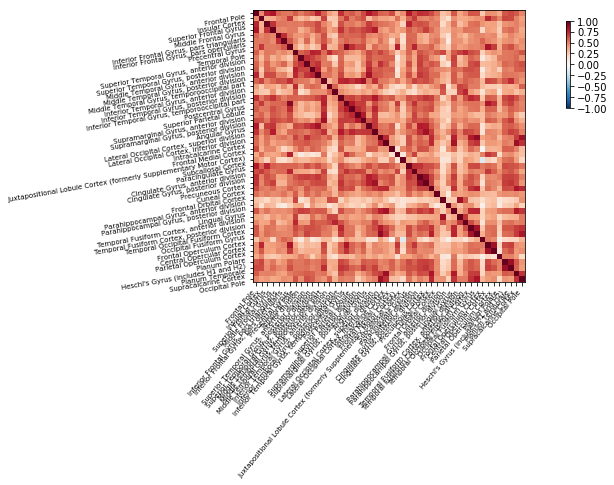

In [19]:
#little test
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

data_t = pkl.load(open( "shuffled_data_pcp.p", "rb" ))

print(data_t['trn_x'][55, ])
print(data_t['trn_y'][55])
print(data_t['val_x'][117, ])
print(data_t['val_y'][117])
print()
print(data['trn_x'][56, ])
print(data['trn_y'][56])
print(data['val_x'][117, ])
print(data['val_y'][117])

display = plotting.plot_matrix(data_t['trn_x'][190].reshape(48, 48), vmin=-1.0, vmax=1.0, colorbar=True, labels=labels[1:])
plotting.show()

In [18]:
#Data prepration for graph embedding
#Add one super-node connected to every other node to represent the graph-level structure

###This may not be a good idea actually
'''num_node = 49
num_trn = 725
num_val = 182

ge_trn_x = np.zeros((num_trn, num_node*num_node))
ge_val_x = np.zeros((num_val, num_node*num_node))

data_t = pkl.load(open( "shuffled_data.p", "rb" ))
trn_x = data_t['trn_x']
val_x = data_t['val_x']

#process trining samples
for i in range(num_trn):
    new_sample = np.zeros((num_node, num_node))
    sample = trn_x[i].reshape(48, 48)
    new_sample[0:48, 0:48] = sample
    new_sample[48] = np.ones((num_node))
    new_sample[:, 48] = np.ones((num_node))
    ge_trn_x[i] = new_sample.reshape(1, -1)

for i in range(num_val):
    new_sample = np.zeros((num_node, num_node))
    sample = val_x[i].reshape(48, 48)
    new_sample[0:48, 0:48] = sample
    new_sample[48] = np.ones((num_node))
    new_sample[:, 48] = np.ones((num_node))
    ge_val_x[i] = new_sample.reshape(1, -1)
    
display = plotting.plot_matrix(data_t['val_x'][19].reshape(48, 48), vmin=-1.0, vmax=1.0, colorbar=True, labels=labels[1:])
plotting.show()

display = plotting.plot_matrix(ge_val_x[19].reshape(49, 49), vmin=-1.0, vmax=1.0, colorbar=True, labels=labels[1:])
plotting.show()

ge_original_data = {}
ge_original_data['trn_x'] = ge_trn_x
ge_original_data['trn_y'] = data_t['trn_y']
ge_original_data['val_x'] = ge_val_x
ge_original_data['val_y'] = data_t['val_y']

pkl.dump(ge_original_data, open(os.path.join('.', 'ge_original_data.p'), 'wb'))'''

'num_node = 49\nnum_trn = 725\nnum_val = 182\n\nge_trn_x = np.zeros((num_trn, num_node*num_node))\nge_val_x = np.zeros((num_val, num_node*num_node))\n\ndata_t = pkl.load(open( "shuffled_data.p", "rb" ))\ntrn_x = data_t[\'trn_x\']\nval_x = data_t[\'val_x\']\n\n#process trining samples\nfor i in range(num_trn):\n    new_sample = np.zeros((num_node, num_node))\n    sample = trn_x[i].reshape(48, 48)\n    new_sample[0:48, 0:48] = sample\n    new_sample[48] = np.ones((num_node))\n    new_sample[:, 48] = np.ones((num_node))\n    ge_trn_x[i] = new_sample.reshape(1, -1)\n\nfor i in range(num_val):\n    new_sample = np.zeros((num_node, num_node))\n    sample = val_x[i].reshape(48, 48)\n    new_sample[0:48, 0:48] = sample\n    new_sample[48] = np.ones((num_node))\n    new_sample[:, 48] = np.ones((num_node))\n    ge_val_x[i] = new_sample.reshape(1, -1)\n    \ndisplay = plotting.plot_matrix(data_t[\'val_x\'][19].reshape(48, 48), vmin=-1.0, vmax=1.0, colorbar=True, labels=labels[1:])\nplotting.show(

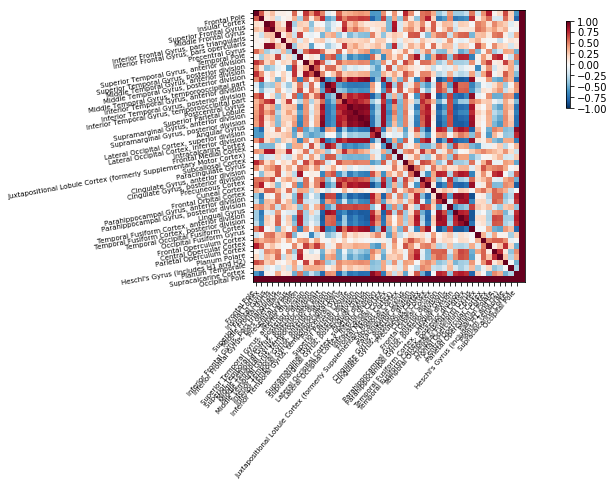

In [7]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

data_t = pkl.load(open( "ge_original_data.p", "rb" ))

display = plotting.plot_matrix(data_t['val_x'][20].reshape(49, 49), vmin=-1.0, vmax=1.0, colorbar=True, labels=labels[1:])
plotting.show()

In [2]:
##DeepWalk
data_t = pkl.load(open( "shuffled_data_pcp.p", "rb" ))
trn_x = data_t['trn_x']
trn_y = data_t['trn_y']
val_x = data_t['val_x']
val_y = data_t['val_y']

num_trn = trn_x.shape[0]
num_val = val_x.shape[0]
node_vec_len = 64
num_node = 48

print(num_trn, num_val)

deepWalk_data = {}
deepWalk_data['trn_x'] = np.zeros((num_trn, node_vec_len*num_node))
deepWalk_data['trn_y'] = trn_y
deepWalk_data['val_x'] = np.zeros((num_val, node_vec_len*num_node))
deepWalk_data['val_y'] = val_y

for i in range(num_trn):
    print('trn ', i, flush=True)
    file = open('edge_list.txt', 'w')
    trn_x_sample = trn_x[i]
    trn_x_sample = trn_x_sample.reshape(num_node, num_node)
    for j in range(num_node):
        for k in range(j+1, num_node):
            res = ' '.join(str(x) for x in [j, k, trn_x_sample[j, k]])
            file.write(res)
            file.write('\n')
    file.close()
    os.system('python -m openne --method deepWalk --input edge_list.txt --graph-format edgelist --output out.txt --weighted --encoder-list [1000,64]')
    temp = []
    with open('out.txt', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            temp.append(row)
    temp = temp[1:]
    temp = sorted(temp, key=lambda x: x[0])
    new_sample = []
    #print(temp, flush=True)
    new_sample = np.asarray(temp)
    new_sample = new_sample[:, 1:(node_vec_len+1)]
    new_sample = new_sample.reshape(1, node_vec_len*num_node)
    print(new_sample)
    deepWalk_data['trn_x'][i] = new_sample
    os.system('del edge_list.txt')
    os.system('del out.txt')


for i in range(num_val):
    print('val ', i, flush=True)
    file = open('edge_list.txt', 'w')
    val_x_sample = val_x[i]
    val_x_sample = val_x_sample.reshape(num_node, num_node)
    for j in range(num_node):
        for k in range(j+1, num_node):
            res = ' '.join(str(x) for x in [j, k, val_x_sample[j, k]])
            file.write(res)
            file.write('\n')
    file.close()
    os.system('python -m openne --method deepWalk --input edge_list.txt --graph-format edgelist --output out.txt --weighted --encoder-list [1000,64]')
    temp = []
    with open('out.txt', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            temp.append(row)
    temp = temp[1:]
    temp = sorted(temp, key=lambda x: x[0])
    new_sample = []
    #print(temp, flush=True)
    new_sample = np.asarray(temp)
    new_sample = new_sample[:, 1:(node_vec_len+1)]
    new_sample = new_sample.reshape(1, node_vec_len*num_node)
    deepWalk_data['val_x'][i] = new_sample
    os.system('del edge_list.txt')
    os.system('del out.txt')
    
pkl.dump(deepWalk_data, open(os.path.join('.', 'deepWalk_data_pcp.p'), 'wb'))

696 175
trn  0
[[-0.00131937 -0.00284334 -0.02432448 ...  0.02320442 -0.09288636
   0.13099225]]
trn  1
[[-0.14557797  0.15467204  0.05748054 ...  0.10841916  0.09638192
  -0.01660831]]
trn  2
[[-0.0014731   0.00427196  0.03205806 ...  0.03453221  0.06289936
  -0.06417798]]
trn  3
[[-0.11060723  0.02834047  0.00645939 ... -0.08967856 -0.05857691
   0.09275661]]
trn  4
[[-0.05692799 -0.09722106 -0.03471445 ... -0.08208362 -0.02153875
  -0.03710635]]
trn  5
[[-0.11916863  0.01179407 -0.10877553 ...  0.01997197 -0.11510782
   0.06722701]]
trn  6
[[ 0.00209232  0.07547259 -0.08135101 ... -0.1119018   0.08216227
  -0.06074921]]
trn  7
[[-0.03142853 -0.10960577  0.00724752 ... -0.0371134  -0.00893612
   0.07272257]]
trn  8
[[-0.13621011  0.05056261  0.12608479 ... -0.032739   -0.05069892
   0.11438611]]
trn  9
[[-0.08505168  0.01728482 -0.03323934 ... -0.1148246  -0.09733483
  -0.07604273]]
trn  10
[[-0.14693436 -0.06835847  0.01077125 ...  0.01238052 -0.13618053
  -0.06691421]]
trn  11
[[ 0

[[-0.01370898 -0.02940104  0.01027369 ... -0.04488813  0.09849979
   0.10017103]]
trn  93
[[-0.0307002  -0.02194782 -0.17953731 ... -0.00867259 -0.05959167
  -0.04005912]]
trn  94
[[ 0.05274343  0.05312198 -0.01478608 ...  0.08369803  0.06280515
   0.05618723]]
trn  95
[[-0.00766692 -0.06162566  0.11317815 ... -0.05739108 -0.01993157
  -0.05592551]]
trn  96
[[-0.06394508 -0.08416253  0.03177648 ... -0.02133003 -0.01734955
  -0.06505514]]
trn  97
[[ 0.00736591 -0.01569255  0.00659495 ...  0.09427774 -0.02999016
  -0.05893528]]
trn  98
[[-0.06643549 -0.03922595 -0.07402147 ...  0.07151563  0.15969092
   0.04772338]]
trn  99
[[-0.03834068  0.02277841 -0.01133979 ... -0.08971102 -0.00682554
  -0.05542215]]
trn  100
[[-0.03364662  0.10182106  0.13255893 ... -0.03908875 -0.0035029
  -0.14394102]]
trn  101
[[-0.05722751 -0.02755691  0.03272379 ... -0.0173731   0.02749312
  -0.08006228]]
trn  102
[[-0.0422995   0.00021936  0.08316008 ...  0.18108505  0.01113703
   0.02173958]]
trn  103
[[ 0.05

[[-0.02734785 -0.05881184 -0.04341128 ...  0.02608647 -0.04423495
  -0.07865872]]
trn  184
[[-0.06758108 -0.03336559 -0.00428807 ... -0.01869131 -0.10604561
   0.01201531]]
trn  185
[[ 0.02993276  0.02392018 -0.04529273 ...  0.10662229  0.0060734
   0.07429279]]
trn  186
[[ 0.03001509  0.0054856  -0.03499986 ... -0.12903644  0.01166078
   0.06100452]]
trn  187
[[ 0.11493512 -0.21093456  0.04203    ... -0.08986725 -0.04847463
   0.0428456 ]]
trn  188
[[-0.03379808  0.02628169  0.04314836 ... -0.16612871 -0.04370525
   0.00194709]]
trn  189
[[ 0.01950413  0.05557258  0.02551782 ... -0.03636049 -0.09539226
   0.03880657]]
trn  190
[[ 0.00920948 -0.08182464  0.0771607  ...  0.03305011  0.01302993
  -0.0355955 ]]
trn  191
[[-0.05909354 -0.05177491  0.10469251 ... -0.05032331  0.02729737
  -0.03543049]]
trn  192
[[ 0.01022634 -0.19674267  0.15786687 ...  0.06071689  0.00323801
   0.04622179]]
trn  193
[[ 0.02449124  0.00529218 -0.01907235 ...  0.00721675  0.01873042
   0.03286385]]
trn  194


[[ 0.06146295 -0.01939456  0.11094615 ...  0.03833209  0.0702686
   0.01138147]]
trn  275
[[-0.01115759 -0.09719139  0.01085677 ... -0.08182835  0.0698771
  -0.09252883]]
trn  276
[[-0.08157337 -0.04411218  0.12116784 ... -0.00521588 -0.00581788
   0.06442724]]
trn  277
[[ 0.10682059  0.08705149  0.05393243 ...  0.00021828 -0.01712313
  -0.06667013]]
trn  278
[[ 0.01619243 -0.01679792 -0.02506039 ... -0.14137964 -0.05812505
   0.02110828]]
trn  279
[[-0.02891546 -0.01392619  0.02464501 ... -0.07498183 -0.03625808
  -0.1439082 ]]
trn  280
[[0.05353688 0.02293241 0.04714561 ... 0.00811882 0.02650787 0.05336003]]
trn  281
[[ 0.0804602   0.02262768  0.00826502 ...  0.02940684 -0.05813833
  -0.06569427]]
trn  282
[[-0.03684809  0.03386403  0.00891763 ... -0.12768115 -0.04365848
   0.04547946]]
trn  283
[[-0.15312107  0.0475109  -0.03212732 ...  0.01597411  0.04861173
  -0.1467536 ]]
trn  284
[[-0.03442432  0.0406589  -0.06511386 ...  0.14178675  0.10722278
  -0.12224472]]
trn  285
[[ 0.0675

[[ 0.06749444  0.06496945  0.09071873 ... -0.00248696  0.01101069
   0.10270598]]
trn  366
[[ 0.02365792  0.08168493 -0.01861596 ...  0.01028972 -0.08678047
  -0.12330322]]
trn  367
[[-0.02840433  0.08341341 -0.06310274 ...  0.08527264 -0.04485789
  -0.13999572]]
trn  368
[[ 0.12002636  0.03765383  0.08301524 ... -0.08582833 -0.06783184
  -0.06303509]]
trn  369
[[0.01821547 0.20241374 0.09178527 ... 0.13205883 0.01993256 0.1120858 ]]
trn  370
[[-0.0236818   0.13414721  0.10282432 ...  0.03159749  0.06812901
  -0.01377911]]
trn  371
[[ 0.18835378  0.01798707  0.07140593 ... -0.08173893 -0.00447071
  -0.08189786]]
trn  372
[[ 0.04268011  0.09345287 -0.05968336 ... -0.07686178 -0.13604125
   0.04759336]]
trn  373
[[-0.05683425  0.16867362 -0.09517515 ... -0.10913286  0.05607643
   0.05040919]]
trn  374
[[ 0.00998764  0.12997746 -0.04551443 ...  0.07420027 -0.1331174
  -0.02195467]]
trn  375
[[-0.04638844  0.05432525 -0.04135434 ...  0.00544834 -0.09906657
  -0.01701463]]
trn  376
[[-0.047

[[ 6.3436754e-02  1.5916575e-01 -7.9978640e-03 ... -5.1410316e-05
  -6.2616430e-02 -2.9627278e-02]]
trn  457
[[-0.04519147  0.03530221  0.02494591 ... -0.02931638 -0.06724675
  -0.00758551]]
trn  458
[[ 0.02824749  0.01971731  0.04029709 ...  0.07412947 -0.04425411
   0.02169005]]
trn  459
[[-0.12604731  0.02660303  0.23249027 ... -0.01338451 -0.06684458
  -0.06886496]]
trn  460
[[ 0.25061876 -0.0049347  -0.22702587 ... -0.13644026  0.0539531
  -0.08779863]]
trn  461
[[-0.01798833 -0.02826528  0.00749758 ... -0.09483774 -0.10176233
   0.1859694 ]]
trn  462
[[-0.10666273  0.05020463  0.08589371 ...  0.05461714  0.00282292
   0.05234823]]
trn  463
[[ 0.07837115 -0.04853771  0.05467254 ...  0.04162801  0.02459007
   0.02621641]]
trn  464
[[ 0.20736387 -0.04348792  0.01183206 ... -0.10199834 -0.1623099
  -0.05325266]]
trn  465
[[-0.05520192  0.0675182   0.13158037 ...  0.08196323 -0.02122018
   0.01550245]]
trn  466
[[ 1.0206677e-04 -6.9677690e-02 -3.5578850e-02 ... -1.3168742e-01
  -1.277

[[-0.03862175  0.05603188 -0.00706205 ...  0.03608116  0.00159809
  -0.1345731 ]]
trn  547
[[ 0.00658173  0.03262874 -0.02211481 ...  0.10520635  0.1074977
  -0.17713504]]
trn  548
[[ 0.09741069 -0.24024843 -0.10156884 ... -0.16900103  0.02126278
   0.07149039]]
trn  549
[[ 0.02012715 -0.05137528  0.00063739 ... -0.0016304   0.09147376
  -0.02939944]]
trn  550
[[-0.09733866  0.04094879  0.01724085 ... -0.03662026 -0.08232991
   0.09162077]]
trn  551
[[ 0.0471176   0.04347391 -0.05401251 ...  0.0470271   0.04187778
   0.25297683]]
trn  552
[[ 0.09162464  0.05010065 -0.18266477 ... -0.08055872 -0.05886954
  -0.00905087]]
trn  553
[[ 0.12610854  0.06357084 -0.0722495  ... -0.02366164  0.14412928
  -0.06000022]]
trn  554
[[0.03344829 0.023181   0.01397157 ... 0.00829872 0.04072764 0.00971789]]
trn  555
[[-0.11810987 -0.03212996 -0.09371604 ...  0.06067598  0.05844803
  -0.154039  ]]
trn  556
[[-0.07578367 -0.03499862 -0.14010443 ... -0.07193895 -0.04100268
   0.04504614]]
trn  557
[[-0.122

[[ 0.0098007   0.05340215  0.05778014 ... -0.06885456 -0.01256135
  -0.05323873]]
trn  637
[[ 0.09662852 -0.11784562  0.03414539 ...  0.0164017   0.12962139
  -0.14845651]]
trn  638
[[ 0.04281809 -0.01276991  0.04695376 ... -0.06527123  0.00879085
  -0.06237401]]
trn  639
[[-0.10036853  0.03986271  0.02038959 ... -0.14347394  0.05660585
  -0.01518426]]
trn  640
[[-0.02247744 -0.0884954   0.0070726  ...  0.01921746  0.09543201
   0.07057821]]
trn  641
[[-0.03412734  0.08710713  0.02235874 ... -0.12421854 -0.0809864
   0.07981609]]
trn  642
[[ 0.02810003 -0.00530045  0.08678931 ... -0.10308151  0.06536971
   0.04270883]]
trn  643
[[-0.06000766 -0.07588929 -0.07653452 ... -0.01602335  0.11356142
  -0.04520082]]
trn  644
[[-0.03887824  0.10550617  0.02902793 ...  0.19444427  0.02180989
   0.0282609 ]]
trn  645
[[-0.0286669   0.09461354  0.00898039 ... -0.01035273 -0.00867464
   0.01798845]]
trn  646
[[-0.03643625  0.02537246  0.08090076 ... -0.05078919 -0.0690344
   0.12696336]]
trn  647
[

In [4]:
data_dw = pkl.load(open( "deepwalk_data_pcp.p", "rb" ))
print(data_dw['trn_x'].shape)
print(data_dw['val_x'].shape)
print(data_dw['trn_x'][30])
print(data_dw['val_x'][10])

(696, 3072)
(175, 3072)
[ 0.02289904 -0.07239512 -0.04679047 ... -0.01262707  0.00185328
 -0.1480699 ]
[ 0.04336262 -0.02657415  0.13137358 ...  0.17203677 -0.03491888
  0.18026286]


In [2]:
##SDNE
data_t = pkl.load(open( "shuffled_data_pcp.p", "rb" ))
trn_x = data_t['trn_x']
trn_y = data_t['trn_y']
val_x = data_t['val_x']
val_y = data_t['val_y']

num_trn = trn_x.shape[0]
num_val = val_x.shape[0]
node_vec_len = 64
num_node = 48

print(num_trn, num_val)

sdne_data = {}
sdne_data['trn_x'] = np.zeros((num_trn, node_vec_len*num_node))
sdne_data['trn_y'] = trn_y
sdne_data['val_x'] = np.zeros((num_val, node_vec_len*num_node))
sdne_data['val_y'] = val_y

for i in range(num_trn):
    print('trn ', i, flush=True)
    file = open('edge_list.txt', 'w')
    trn_x_sample = trn_x[i]
    trn_x_sample = trn_x_sample.reshape(num_node, num_node)
    for j in range(num_node):
        for k in range(j+1, num_node):
            res = ' '.join(str(x) for x in [j, k, trn_x_sample[j, k]])
            file.write(res)
            file.write('\n')
    file.close()
    os.system('python -m openne --method sdne --input edge_list.txt --graph-format edgelist --output out.txt --bs 1 --encoder-list [1000,64] --lr 0.001 --weighted')
    temp = []
    with open('out.txt', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            temp.append(row)
    temp = temp[1:]
    temp = sorted(temp, key=lambda x: x[0])
    new_sample = []
    new_sample = np.asarray(temp)
    new_sample = new_sample[:, 1:(node_vec_len+1)]
    new_sample = new_sample.reshape(1, node_vec_len*num_node)
    print(new_sample)
    sdne_data['trn_x'][i] = new_sample
    os.system('del edge_list.txt')
    os.system('del out.txt')


for i in range(num_val):
    print('val ', i, flush=True)
    file = open('edge_list.txt', 'w')
    val_x_sample = val_x[i]
    val_x_sample = val_x_sample.reshape(num_node, num_node)
    for j in range(num_node):
        for k in range(j+1, num_node):
            res = ' '.join(str(x) for x in [j, k, val_x_sample[j, k]])
            file.write(res)
            file.write('\n')
    file.close()
    os.system('python -m openne --method sdne --input edge_list.txt --graph-format edgelist --output out.txt --bs 1 --encoder-list [1000,64] --lr 0.001 --weighted')
    temp = []
    with open('out.txt', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            temp.append(row)
    temp = temp[1:]
    temp = sorted(temp, key=lambda x: x[0])
    new_sample = []
    new_sample = np.asarray(temp)
    new_sample = new_sample[:, 1:(node_vec_len+1)]
    new_sample = new_sample.reshape(1, node_vec_len*num_node)
    print(new_sample)
    sdne_data['val_x'][i] = new_sample
    os.system('del edge_list.txt')
    os.system('del out.txt')
    
pkl.dump(sdne_data, open(os.path.join('.', 'sdne_data_pcp.p'), 'wb'))

696 175
trn  0
[[-0.04149097  0.07065037  0.25266054 ...  0.1533492  -0.06626985
   0.14486419]]
trn  1
[[-0.03316815  0.07933915 -0.04078938 ...  0.06818774 -0.01981606
  -0.00020857]]
trn  2
[[-0.05238795  0.41976202 -0.02851608 ... -0.08720612 -0.03970594
  -0.05408636]]
trn  3
[[-0.08649541 -0.09392812 -0.03645347 ...  0.72625536 -0.04518216
   0.20882405]]
trn  4
[[ 0.4267941  -0.05262097 -0.04317908 ...  0.88638014 -0.01159619
  -0.07034507]]
trn  5
[[ 0.44016653 -0.08960091 -0.07937458 ... -0.01134579  0.06405184
   0.05516002]]
trn  6
[[-0.04869269  0.44483584 -0.0585238  ... -0.00178687  0.0866329
  -0.04608565]]
trn  7
[[-0.00066966  0.36325926  0.21309666 ... -0.01698254 -0.02207167
   0.00659064]]
trn  8
[[-0.10201551 -0.02284287  0.08524481 ...  0.31025302 -0.00452965
  -0.03489985]]
trn  9
[[ 0.23275194 -0.03182785  0.03218314 ... -0.01767967  0.05601646
   0.14600262]]
trn  10
[[-0.04031489 -0.07037003 -0.06131187 ...  0.05662135 -0.06364084
  -0.01449318]]
trn  11
[[-0.

[[ 0.16231342  0.22287236 -0.03612471 ... -0.01476144 -0.0259225
  -0.02349185]]
trn  92
[[-0.00323136  0.563908   -0.08633005 ... -0.02710704 -0.0107117
   0.0460552 ]]
trn  93
[[ 0.15648709 -0.02644685 -0.04734147 ...  0.39412007 -0.10792916
  -0.03299945]]
trn  94
[[-0.04061055  0.30624983 -0.02542268 ... -0.0615711   0.04874323
   0.21790542]]
trn  95
[[-0.09574716  0.43175232  0.34589732 ... -0.07339811  0.34863853
  -0.03635393]]
trn  96
[[ 0.41795036 -0.09526458  0.0075737  ...  0.03927635  0.13356562
   0.18209249]]
trn  97
[[-0.0264101  -0.0228064   0.05952981 ... -0.05241484 -0.00575132
   0.41355962]]
trn  98
[[ 0.3207161   0.16555066  0.743646   ...  0.08699112 -0.07764596
  -0.03046061]]
trn  99
[[-0.04532148 -0.0529443  -0.06387922 ... -0.0746388  -0.01708206
   0.2325841 ]]
trn  100
[[-0.01324955 -0.05993228 -0.06130321 ...  0.35179564 -0.05199658
   0.10856566]]
trn  101
[[ 0.44199863 -0.05435163 -0.02793405 ... -0.15518074  0.53037345
  -0.06114362]]
trn  102
[[-0.0273

[[-0.02676642  0.12196624 -0.159749   ...  0.1486117   0.5509434
   0.09281108]]
trn  182
[[ 0.10482532 -0.00341191 -0.04096609 ... -0.00674834 -0.02044902
  -0.02118279]]
trn  183
[[ 0.01623118 -0.02090788 -0.07357136 ...  0.30731103 -0.02590801
  -0.03077103]]
trn  184
[[-0.0303578  -0.05924158 -0.03433451 ...  0.23482683 -0.0949258
   0.06166704]]
trn  185
[[-0.03442529 -0.0324653  -0.04240859 ...  0.00588675  0.56552386
  -0.02634347]]
trn  186
[[-0.04157168 -0.01982312 -0.03910538 ... -0.01059782 -0.04927164
  -0.02901605]]
trn  187
[[-0.05043411  0.08846069  0.39862096 ...  0.8614251  -0.11716723
   0.15657479]]
trn  188
[[ 0.52394557 -0.01121798  0.43381932 ... -0.04670841 -0.0401765
  -0.01444079]]
trn  189
[[-0.05174983 -0.03312755  0.33283    ...  0.19014396  0.08368677
  -0.0796351 ]]
trn  190
[[-0.03588205 -0.05758867  0.51647884 ... -0.01553478  0.38919154
  -0.06306484]]
trn  191
[[ 0.6247733  -0.10156274  0.0817838  ... -0.01624697 -0.07426836
  -0.01613739]]
trn  192
[[

[[-0.02348545 -0.03345372 -0.04559988 ...  0.19266507 -0.05002295
  -0.04468055]]
trn  273
[[-0.0760546  -0.01224298  0.5872861  ...  0.32076886 -0.0867263
  -0.08038487]]
trn  274
[[-0.00591297 -0.02505357  0.12598345 ...  0.23256232 -0.03909661
  -0.08361602]]
trn  275
[[ 0.2602742  -0.03582418 -0.00157657 ... -0.09118202  0.29462737
  -0.04558617]]
trn  276
[[-0.0371812   0.32608455  0.00335905 ... -0.02350913  0.1297677
   0.8680633 ]]
trn  277
[[-0.03909555 -0.10921381  0.02525099 ...  0.37179154 -0.08424827
   0.3202017 ]]
trn  278
[[-0.00647617  0.02882546 -0.03072323 ...  0.01125663  0.05467972
  -0.05523964]]
trn  279
[[-0.07746293 -0.06074582 -0.03525404 ... -0.02768769 -0.03801116
  -0.04957811]]
trn  280
[[ 0.7299104   0.31105876 -0.05116298 ...  0.33215794 -0.0164472
  -0.05766968]]
trn  281
[[-0.07232545 -0.00166281 -0.03148847 ... -0.05494887 -0.07426899
  -0.01475294]]
trn  282
[[-0.05133037  0.8189961  -0.03298342 ... -0.06598249  0.258951
  -0.0264642 ]]
trn  283
[[-0

[[-0.0582553  -0.04489392  0.37723485 ... -0.03026524 -0.02560847
   0.7247228 ]]
trn  363
[[-0.04633193  0.11187252 -0.07906791 ... -0.0665216   0.32074067
  -0.03765673]]
trn  364
[[-0.00219057  0.5401672  -0.04839623 ... -0.0049202   0.38028532
  -0.00381146]]
trn  365
[[ 0.7205524   0.0245359  -0.08421804 ...  0.08289877 -0.01384539
   0.39401934]]
trn  366
[[ 0.5004548   0.16128473 -0.04240412 ... -0.03235666 -0.06103713
  -0.06844702]]
trn  367
[[-0.0123371  -0.03593698  0.46179363 ... -0.04878235 -0.04083407
  -0.01338222]]
trn  368
[[ 0.1939998   0.9295977   0.04044664 ... -0.05061949  0.2151697
   0.45045418]]
trn  369
[[-0.02876924 -0.10611977  0.24274309 ...  0.2629733   0.0096542
  -0.04618513]]
trn  370
[[ 0.87951267 -0.04506339  0.6129323  ... -0.03699523 -0.00821902
  -0.05442412]]
trn  371
[[-0.00373738 -0.04760237 -0.04803497 ... -0.0470176  -0.08080011
   0.02383431]]
trn  372
[[-0.01326437 -0.10697187  0.37255418 ...  0.3042487   0.64148504
  -0.12011116]]
trn  373
[

[[ 0.31586456 -0.06955313 -0.05018828 ... -0.00697449  0.16223504
   0.02339273]]
trn  453
[[-0.00551328  0.76513165  0.25419703 ...  0.09248577 -0.03492497
  -0.01873995]]
trn  454
[[-0.04238452 -0.03280399 -0.05483385 ... -0.04212692 -0.10491089
  -0.00271043]]
trn  455
[[-0.0879645  -0.055137   -0.04565942 ... -0.04701474 -0.05041276
   0.25663218]]
trn  456
[[-0.05058585 -0.03997235  0.04757018 ... -0.05051641  0.05876887
  -0.0290419 ]]
trn  457
[[-0.04453021 -0.01672007 -0.03861822 ... -0.03206809 -0.04023544
   0.07989143]]
trn  458
[[ 0.272      -0.07259347  0.13550213 ... -0.10551979  0.42006677
  -0.04709718]]
trn  459
[[-0.0543123   0.21787907  0.20215861 ...  0.02441777 -0.0101703
  -0.06611305]]
trn  460
[[-0.03666551  1.2792696  -0.0568198  ... -0.04059793 -0.06368753
  -0.15659773]]
trn  461
[[-0.05017784 -0.10381535 -0.07566028 ... -0.04602895  0.23138143
  -0.01999791]]
trn  462
[[ 0.63386446 -0.07612311  0.05162195 ... -0.02448791 -0.03106641
   0.08990934]]
trn  463


[[-0.01885848 -0.02735066  0.28226817 ... -0.0217719  -0.07003093
  -0.05149644]]
trn  543
[[-1.5018477e-04  4.0205070e-02 -1.0715562e-02 ...  5.1703430e-02
   1.6735666e-01 -2.9138872e-02]]
trn  544
[[-0.05225294 -0.06281698  0.00912808 ... -0.05784149 -0.04465153
  -0.00764679]]
trn  545
[[-0.04540071 -0.05681549 -0.04146498 ... -0.04151011  0.3215462
  -0.0636477 ]]
trn  546
[[ 0.8939576  -0.03771283 -0.04441224 ... -0.00471918 -0.1093858
   0.1151574 ]]
trn  547
[[-0.04697613 -0.01803822  0.06134747 ...  0.06608234  0.02045508
   0.19798575]]
trn  548
[[ 0.30687428 -0.0034277  -0.02206122 ... -0.06812759 -0.01414568
   0.13352942]]
trn  549
[[-0.07899069  0.02271705 -0.0683113  ... -0.07744686  0.29009956
  -0.02209115]]
trn  550
[[ 0.12450159 -0.01139295 -0.01714329 ...  0.33288828  0.47088322
  -0.04456576]]
trn  551
[[ 6.7087173e-01 -3.6890272e-02 -2.1998763e-02 ... -3.4343330e-02
   1.5915278e-04 -2.3381338e-04]]
trn  552
[[-0.03778066 -0.03860499  0.50381655 ... -0.01191407 -0

[[ 0.3501836   0.3062837   0.23122235 ... -0.00712864  0.23018889
  -0.02296106]]
trn  633
[[ 0.5118334  -0.03940177  0.46593022 ... -0.01054516 -0.08210271
   0.02665902]]
trn  634
[[-0.05056452  0.19746003 -0.01936698 ...  0.05954326 -0.01437085
  -0.02741305]]
trn  635
[[-0.04163727  0.28009832  0.52048343 ... -0.03515226 -0.05441533
  -0.0284608 ]]
trn  636
[[-0.0236406   0.04396303  0.2482198  ... -0.01000212  0.0564688
  -0.02939928]]
trn  637
[[ 0.1818226  -0.03524728 -0.04860783 ...  0.29922882  0.13644043
   0.15003453]]
trn  638
[[ 0.15772687 -0.09750785 -0.00279009 ...  0.41355193 -0.05009612
  -0.02987473]]
trn  639
[[-0.03352    -0.11511605  0.26865733 ... -0.06864104  0.07241602
  -0.0063013 ]]
trn  640
[[-0.02851542 -0.00662514 -0.0259623  ... -0.05464199 -0.05348396
  -0.07486065]]
trn  641
[[ 0.02087594 -0.12511472  0.05628011 ...  0.4800481  -0.06204219
  -0.04031343]]
trn  642
[[-0.06851765  0.05696175  0.0104789  ...  0.37493697  0.10479932
  -0.07413802]]
trn  643


[[-0.04666552 -0.03345852  0.28219873 ... -0.04632748 -0.0050847
   0.17804016]]
val  28
[[-0.06002117 -0.02443229  0.441558   ...  0.77712095 -0.03406236
   0.99046457]]
val  29
[[ 0.49986348  0.30496848 -0.0098541  ...  0.66390437  0.10382903
   0.33880734]]
val  30
[[-0.05322136 -0.0372291   0.05225095 ... -0.02677858 -0.06398522
   0.17444755]]
val  31
[[ 0.19838783  0.5084504  -0.05954316 ... -0.02446256 -0.02088928
   0.14832552]]
val  32
[[ 0.45508704  0.12689084  0.3126499  ... -0.03682674 -0.0517843
   0.15274943]]
val  33
[[-0.02737299 -0.04315932  0.27638742 ...  0.71693635 -0.05154346
  -0.09585739]]
val  34
[[ 0.9343135  -0.01090608 -0.0759249  ... -0.0486961  -0.08671611
  -0.01694321]]
val  35
[[ 0.45237538  0.5780216  -0.03498568 ...  0.6055516  -0.01721702
   0.49003378]]
val  36
[[ 0.5997322  -0.0401864  -0.08284848 ... -0.04137946 -0.03600338
  -0.04460299]]
val  37
[[-0.01084942  0.7538285  -0.05788174 ... -0.05257241 -0.02625337
  -0.04098248]]
val  38
[[-0.0750702

[[ 0.39598197  0.00822908  0.21731775 ...  0.02835603 -0.00452449
  -0.0364313 ]]
val  119
[[-0.00190596 -0.03014675 -0.0310481  ... -0.07395343 -0.02496303
   0.40189546]]
val  120
[[-0.04313795 -0.03770861 -0.06533334 ...  0.41193503 -0.05120202
  -0.04427593]]
val  121
[[-0.05803765 -0.03906292 -0.01454333 ...  0.6052815  -0.06406842
  -0.03162607]]
val  122
[[-0.02375081 -0.01126025 -0.05353555 ... -0.02779028  0.06317904
  -0.0238776 ]]
val  123
[[ 0.4844057  -0.06169875 -0.00912358 ... -0.08379673 -0.05218143
   0.05039315]]
val  124
[[-0.02363829 -0.04908677 -0.07433235 ...  0.03243638 -0.02719103
   0.29391918]]
val  125
[[-0.02297102 -0.0144163   0.15090239 ... -0.02706955 -0.02777939
   0.3128219 ]]
val  126
[[ 4.7171462e-01 -4.4952706e-02 -1.6038828e-02 ... -1.4464577e-02
   2.1191488e-01 -4.0395470e-04]]
val  127
[[ 8.9800045e-02  1.7485966e-01  3.2182088e-01 ... -5.2651763e-04
   7.3929160e-01  2.5791126e-01]]
val  128
[[-0.06242403  0.4076753   0.2774029  ... -0.04104115 

In [8]:
data_sdne = pkl.load(open( "sdne_data_pcp.p", "rb" ))
print(data_sdne['trn_x'][80])
print(data_sdne['val_x'][20])
print(data_sdne['trn_y'][10])
print(data_sdne['val_y'][17])

[-0.05377181 -0.10714222  0.36063683 ... -0.02600927  0.23889196
 -0.03632004]
[-0.02739315 -0.03251138 -0.06737147 ... -0.03465377 -0.07902022
  0.23354971]
[0. 1.]
[1. 0.]
